## 📊 NOTEBOOK 06 - INTEGRAÇÃO E DEPLOY DO PIPELINE

### 📑 ÍNDICE INTERATIVO

In [2]:
# =============================================================================
# BLOCO 1: ÍNDICE INTERATIVO
# =============================================================================

class IndiceInterativo:
    """Sistema de navegação rápida entre blocos do notebook"""
    
    BLOCOS = {
        "1": {"nome": "🔗 INTEGRAÇÃO DO PIPELINE COMPLETO", "celula": "Bloco 2"},
        "2": {"nome": "🚀 SISTEMA DE DEPLOY E PRODUÇÃO", "celula": "Bloco 3"},
        "3": {"nome": "📊 DASHBOARD DE MONITORAMENTO", "celula": "Bloco 4"},
        "4": {"nome": "🔧 API REST PARA ACESSO EXTERNO", "celula": "Bloco 5"},
        "5": {"nome": "📦 EMPACOTAMENTO E DISTRIBUIÇÃO", "celula": "Bloco 6"},
        "6": {"nome": "🧪 TESTES FINAIS DE INTEGRAÇÃO", "celula": "Bloco 7"},
        "7": {"nome": "📋 DOCUMENTAÇÃO E MANUAL DE USO", "celula": "Bloco 8"},
        "8": {"nome": "🎯 DEPLOY FINAL E VALIDAÇÃO", "celula": "Bloco 9"}
    }
    
    @classmethod
    def mostrar_indice(cls):
        print("🎯 ÍNDICE INTERATIVO - NOTEBOOK 06")
        print("=" * 50)
        for key, info in cls.BLOCOS.items():
            print(f"   {key}. {info['nome']}")
        print("\n   📊 STATUS: Use os números para navegar rapidamente")
        print("   💡 DICA: Execute o bloco 2 primeiro para integração")
    
    @classmethod
    def navegar_para(cls, numero_bloco):
        if numero_bloco in cls.BLOCOS:
            info = cls.BLOCOS[numero_bloco]
            print(f"\n🎯 NAVEGANDO PARA: {info['nome']}")
            print(f"📍 Execute o {info['celula']}")
            return info['celula']
        else:
            print("❌ Bloco não encontrado. Use o índice válido.")
            return None

# Mostrar índice ao iniciar
IndiceInterativo.mostrar_indice()

🎯 ÍNDICE INTERATIVO - NOTEBOOK 06
   1. 🔗 INTEGRAÇÃO DO PIPELINE COMPLETO
   2. 🚀 SISTEMA DE DEPLOY E PRODUÇÃO
   3. 📊 DASHBOARD DE MONITORAMENTO
   4. 🔧 API REST PARA ACESSO EXTERNO
   5. 📦 EMPACOTAMENTO E DISTRIBUIÇÃO
   6. 🧪 TESTES FINAIS DE INTEGRAÇÃO
   7. 📋 DOCUMENTAÇÃO E MANUAL DE USO
   8. 🎯 DEPLOY FINAL E VALIDAÇÃO

   📊 STATUS: Use os números para navegar rapidamente
   💡 DICA: Execute o bloco 2 primeiro para integração


### 🔗 BLOCO 2: INTEGRAÇÃO DO PIPELINE COMPLETO

In [3]:
# =============================================================================
# BLOCO 2: INTEGRAÇÃO DO PIPELINE COMPLETO
# =============================================================================

print("🎯 INICIANDO INTEGRAÇÃO DO PIPELINE COMPLETO")
print("=" * 55)

# Importações para integração
import os
import sys
import json
import pandas as pd
import numpy as np
from pathlib import Path
from datetime import datetime
from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor
import logging
from typing import Dict, List, Optional, Union

class PipelineIntegrado:
    """Pipeline completo integrando todos os processadores"""
    
    def __init__(self, config_path: Optional[Path] = None):
        self.config = self._carregar_configuracao(config_path)
        self.processadores = self._inicializar_processadores()
        self.logger = self._configurar_logging()
        
    def _carregar_configuracao(self, config_path: Optional[Path]) -> Dict:
        """Carrega configuração do pipeline"""
        config_padrao = {
            'diretorio_entrada': Path('./data/raw'),
            'diretorio_saida': Path('./data/processed'),
            'formatos_suportados': ['.pdf', '.dwg', '.rvt'],
            'processamento_paralelo': True,
            'max_workers': 4,
            'logging_level': 'INFO'
        }
        
        if config_path and config_path.exists():
            try:
                with open(config_path, 'r', encoding='utf-8') as f:
                    config_usuario = json.load(f)
                config_padrao.update(config_usuario)
                print(f"✅ Configuração carregada: {config_path}")
            except Exception as e:
                print(f"⚠️  Erro ao carregar configuração: {e}")
        
        return config_padrao
    
    def _inicializar_processadores(self) -> Dict:
        """Inicializa todos os processadores disponíveis"""
        processadores = {}
        
        try:
            # Importar processadores do Notebook 5
            from processadores import ProcessadorPDF, ProcessadorDWG, ProcessadorRVT
            processadores['pdf'] = ProcessadorPDF()
            processadores['dwg'] = ProcessadorDWG()
            processadores['rvt'] = ProcessadorRVT()
            print("✅ Todos os processadores carregados com sucesso!")
            
        except ImportError as e:
            print(f"⚠️  Alguns processadores não disponíveis: {e}")
            # Criar mocks para demonstração
            processadores = self._criar_processadores_mock()
        
        return processadores
    
    def _criar_processadores_mock(self) -> Dict:
        """Cria processadores mock para demonstração"""
        class ProcessadorMock:
            def __init__(self, formato):
                self.formato = formato
            
            def extrair_dados(self, arquivo_path):
                return {
                    'status': 'sucesso_mock',
                    'arquivo': arquivo_path.name,
                    'quantitativos': {
                        'total_entidades': 100,
                        'total_textos': 25,
                        'materiais_encontrados': [
                            {'texto_original': f'M-001 - Material Mock {self.formato}', 'padrao': 'codigo_descricao'}
                        ]
                    }
                }
        
        return {
            'pdf': ProcessadorMock('pdf'),
            'dwg': ProcessadorMock('dwg'),
            'rvt': ProcessadorMock('rvt')
        }
    
    def _configurar_logging(self):
        """Configura sistema de logging"""
        logger = logging.getLogger('PipelineIntegrado')
        logger.setLevel(getattr(logging, self.config['logging_level']))
        
        if not logger.handlers:
            handler = logging.StreamHandler()
            formatter = logging.Formatter(
                '%(asctime)s - %(name)s - %(levelname)s - %(message)s'
            )
            handler.setFormatter(formatter)
            logger.addHandler(handler)
        
        return logger
    
    def processar_arquivo(self, arquivo_path: Path) -> Dict:
        """Processa um único arquivo"""
        try:
            formato = arquivo_path.suffix.lower()
            processador = self.processadores.get(formato[1:])  # Remove o ponto
            
            if not processador:
                return {
                    'status': 'erro',
                    'arquivo': arquivo_path.name,
                    'erro': f'Formato não suportado: {formato}'
                }
            
            self.logger.info(f"Processando: {arquivo_path.name}")
            resultado = processador.extrair_dados(arquivo_path)
            
            # Adicionar metadados ao resultado
            resultado['timestamp_processamento'] = datetime.now().isoformat()
            resultado['formato'] = formato
            resultado['tamanho_arquivo'] = arquivo_path.stat().st_size
            
            return resultado
            
        except Exception as e:
            self.logger.error(f"Erro ao processar {arquivo_path.name}: {e}")
            return {
                'status': 'erro',
                'arquivo': arquivo_path.name,
                'erro': str(e)
            }
    
    def processar_lote(self, diretorio: Optional[Path] = None) -> Dict:
        """Processa todos os arquivos em um diretório"""
        diretorio = diretorio or self.config['diretorio_entrada']
        resultados = {}
        
        if not diretorio.exists():
            self.logger.error(f"Diretório não encontrado: {diretorio}")
            return resultados
        
        arquivos = []
        for formato in self.config['formatos_suportados']:
            arquivos.extend(diretorio.glob(f'*{formato}'))
            arquivos.extend(diretorio.glob(f'*{formato.upper()}'))
        
        self.logger.info(f"Encontrados {len(arquivos)} arquivos para processamento")
        
        if self.config['processamento_paralelo'] and len(arquivos) > 1:
            resultados = self._processar_paralelo(arquivos)
        else:
            resultados = self._processar_sequencial(arquivos)
        
        return resultados
    
    def _processar_sequencial(self, arquivos: List[Path]) -> Dict:
        """Processamento sequencial dos arquivos"""
        resultados = {}
        for arquivo in arquivos:
            resultados[arquivo.name] = self.processar_arquivo(arquivo)
        return resultados
    
    def _processar_paralelo(self, arquivos: List[Path]) -> Dict:
        """Processamento paralelo dos arquivos"""
        resultados = {}
        
        with ThreadPoolExecutor(max_workers=self.config['max_workers']) as executor:
            futures = {
                executor.submit(self.processar_arquivo, arquivo): arquivo.name 
                for arquivo in arquivos
            }
            
            for future in futures:
                nome_arquivo = futures[future]
                try:
                    resultados[nome_arquivo] = future.result(timeout=300)  # 5min timeout
                except Exception as e:
                    resultados[nome_arquivo] = {
                        'status': 'erro',
                        'arquivo': nome_arquivo,
                        'erro': f'Timeout ou erro na execução: {e}'
                    }
        
        return resultados
    
    def salvar_resultados(self, resultados: Dict, diretorio_saida: Optional[Path] = None):
        """Salva resultados do processamento"""
        diretorio_saida = diretorio_saida or self.config['diretorio_saida']
        diretorio_saida.mkdir(parents=True, exist_ok=True)
        
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        
        # Salvar JSON completo
        arquivo_json = diretorio_saida / f'resultados_pipeline_{timestamp}.json'
        with open(arquivo_json, 'w', encoding='utf-8') as f:
            json.dump(resultados, f, indent=2, ensure_ascii=False)
        
        # Salvar resumo em CSV
        dados_resumo = []
        for nome_arquivo, resultado in resultados.items():
            if resultado.get('status', '').startswith('sucesso'):
                quant = resultado.get('quantitativos', {})
                dados_resumo.append({
                    'arquivo': nome_arquivo,
                    'formato': resultado.get('formato', ''),
                    'status': resultado.get('status', ''),
                    'total_entidades': quant.get('total_entidades', 0),
                    'total_textos': quant.get('total_textos', 0),
                    'materiais_encontrados': len(quant.get('materiais_encontrados', [])),
                    'timestamp': resultado.get('timestamp_processamento', '')
                })
        
        if dados_resumo:
            df_resumo = pd.DataFrame(dados_resumo)
            arquivo_csv = diretorio_saida / f'resumo_pipeline_{timestamp}.csv'
            df_resumo.to_csv(arquivo_csv, index=False, encoding='utf-8')
        
        self.logger.info(f"Resultados salvos em: {diretorio_saida}")
        return arquivo_json

# Teste da integração
print("\\n🧪 TESTANDO PIPELINE INTEGRADO...")
pipeline = PipelineIntegrado()
print("✅ Pipeline integrado inicializado com sucesso!")
print(f"📁 Diretório de entrada: {pipeline.config['diretorio_entrada']}")
print(f"📁 Diretório de saída: {pipeline.config['diretorio_saida']}")
print(f"🔧 Processadores carregados: {list(pipeline.processadores.keys())}")

🎯 INICIANDO INTEGRAÇÃO DO PIPELINE COMPLETO
\n🧪 TESTANDO PIPELINE INTEGRADO...
⚠️  Alguns processadores não disponíveis: No module named 'processadores'
✅ Pipeline integrado inicializado com sucesso!
📁 Diretório de entrada: data\raw
📁 Diretório de saída: data\processed
🔧 Processadores carregados: ['pdf', 'dwg', 'rvt']


### 🚀 BLOCO 3: SISTEMA DE DEPLOY E PRODUÇÃO

In [8]:
# =============================================================================
# BLOCO 3: SISTEMA DE DEPLOY E PRODUÇÃO (CORRIGIDO - VERSÃO FINAL)
# =============================================================================

print("🚀 CONFIGURANDO SISTEMA DE DEPLOY E PRODUÇÃO")
print("=" * 55)

import yaml
from dataclasses import dataclass
from enum import Enum
import psutil
import shutil

class Ambiente(Enum):
    DESENVOLVIMENTO = "dev"
    HOMOLOGACAO = "homolog"
    PRODUCAO = "prod"

@dataclass
class ConfiguracaoDeploy:
    """Configuração completa para deploy"""
    ambiente: Ambiente
    diretorio_base: Path
    max_processos: int
    timeout_processamento: int
    recursos: Dict
    backups_habilitados: bool
    notificacoes: Dict

class MetricasPerformance:
    """Coleta métricas de performance do pipeline"""
    
    def __init__(self):
        self.historico = []
        self.metricas_atuais = {}
    
    def registrar_execucao(self, resultados: Dict):
        """Registra métricas de uma execução"""
        metricas = {
            'timestamp': datetime.now().isoformat(),
            'total_arquivos': len(resultados),
            'sucessos': len([r for r in resultados.values() if r.get('status', '').startswith('sucesso')]),
            'erros': len([r for r in resultados.values() if not r.get('status', '').startswith('sucesso')]),
            'tempo_total': 0,  # Seria calculado em implementação real
            'memoria_utilizada': psutil.Process().memory_info().rss
        }
        
        metricas['taxa_sucesso'] = (metricas['sucessos'] / metricas['total_arquivos'] * 100) if metricas['total_arquivos'] > 0 else 0
        self.historico.append(metricas)
        self.metricas_atuais = metricas
        
        return metricas
    
    def obter_metricas(self) -> Dict:
        """Retorna métricas atuais"""
        return self.metricas_atuais
    
    def gerar_relatorio_performance(self) -> Dict:
        """Gera relatório consolidado de performance"""
        if not self.historico:
            return {}
        
        df = pd.DataFrame(self.historico)
        return {
            'execucoes_totais': len(self.historico),
            'taxa_sucesso_media': df['taxa_sucesso'].mean(),
            'memoria_media': df['memoria_utilizada'].mean(),
            'arquivos_processados_media': df['total_arquivos'].mean(),
            'ultima_execucao': self.historico[-1] if self.historico else {}
        }

class GerenciadorDeploy:
    """Gerencia deploy e operação em produção"""
    
    def __init__(self, config_path: Optional[Path] = None):
        self.config = self._carregar_config_deploy(config_path)
        self.pipeline = None  # Será inicializado quando necessário
        self.metricas = MetricasPerformance()
        
    def _carregar_config_deploy(self, config_path: Optional[Path]) -> ConfiguracaoDeploy:
        """Carrega configuração de deploy"""
        # Usar diretório atual como fallback seguro
        diretorio_base = Path('./deploy').resolve()
        
        config_padrao = ConfiguracaoDeploy(
            ambiente=Ambiente.DESENVOLVIMENTO,
            diretorio_base=diretorio_base,
            max_processos=2,
            timeout_processamento=3600,  # 1 hora
            recursos={'memoria_max': '4G', 'cpu_max': '80%'},
            backups_habilitados=True,
            notificacoes={'email': False, 'webhook': False}
        )
        
        if config_path and config_path.exists():
            try:
                if config_path.suffix in ['.yaml', '.yml']:
                    with open(config_path, 'r', encoding='utf-8') as f:
                        config_dict = yaml.safe_load(f)
                else:
                    with open(config_path, 'r', encoding='utf-8') as f:
                        config_dict = json.load(f)
                
                # Atualizar configuração padrão
                for key, value in config_dict.items():
                    if hasattr(config_padrao, key):
                        # Converter string para enum Ambiente se necessário
                        if key == 'ambiente' and isinstance(value, str):
                            value = Ambiente(value)
                        setattr(config_padrao, key, value)
                        
                print(f"✅ Configuração de deploy carregada: {config_path}")
                        
            except Exception as e:
                print(f"⚠️  Erro ao carregar configuração de deploy: {e}")
        
        return config_padrao
    
    def _criar_diretorio_se_nao_existir(self, path: Path):
        """Cria diretório se não existir"""
        if not path.exists():
            path.mkdir(parents=True, exist_ok=True)
            print(f"📁 Diretório criado: {path}")
    
    def verificar_recursos_sistema(self) -> Dict:
        """Verifica recursos disponíveis no sistema"""
        try:
            memoria = psutil.virtual_memory()
            
            # Usar diretório atual para verificação de disco (mais seguro)
            diretorio_verificacao = Path('.').resolve()
            disco = shutil.disk_usage(str(diretorio_verificacao))
            
            recursos = {
                'memoria_total_gb': memoria.total / (1024**3),
                'memoria_disponivel_gb': memoria.available / (1024**3),
                'memoria_percent': memoria.percent,
                'cpu_percent': psutil.cpu_percent(interval=1),
                'disco_total_gb': disco.total / (1024**3),
                'disco_livre_gb': disco.free / (1024**3),
                'disco_percent': (disco.used / disco.total) * 100,
                'diretorio_verificacao': str(diretorio_verificacao)
            }
            
            print("📊 RECURSOS DO SISTEMA:")
            print(f"   • Memória disponível: {recursos['memoria_disponivel_gb']:.1f} GB ({recursos['memoria_percent']:.1f}% usado)")
            print(f"   • Uso de CPU: {recursos['cpu_percent']:.1f}%")
            print(f"   • Disco livre: {recursos['disco_livre_gb']:.1f} GB ({recursos['disco_percent']:.1f}% usado)")
            print(f"   • Diretório verificado: {recursos['diretorio_verificacao']}")
            
            return recursos
            
        except Exception as e:
            print(f"⚠️  Erro ao verificar recursos: {e}")
            # Retornar dados básicos mesmo com erro
            return {
                'memoria_total_gb': 0,
                'memoria_disponivel_gb': 0,
                'memoria_percent': 0,
                'cpu_percent': 0,
                'disco_total_gb': 0,
                'disco_livre_gb': 0,
                'disco_percent': 0,
                'erro': str(e)
            }
    
    def _verificar_requisitos_deploy(self) -> bool:
        """Verifica se todos os requisitos para deploy estão satisfeitos"""
        print("🔍 VERIFICANDO REQUISITOS PARA DEPLOY...")
        
        # Primeiro criar o diretório base
        self._criar_diretorio_se_nao_existir(self.config.diretorio_base)
        
        requisitos = [
            self._verificar_espaco_disco(),
            self._verificar_memoria(),
            self._verificar_dependencias(),
            self._verificar_permissoes()
        ]
        
        if all(requisitos):
            print("✅ Todos os requisitos atendidos!")
            return True
        else:
            print("❌ Alguns requisitos não foram atendidos")
            return False
    
    def _verificar_espaco_disco(self) -> bool:
        """Verifica espaço em disco mínimo (1GB)"""
        try:
            # Usar diretório atual para verificação
            diretorio_verificacao = Path('.').resolve()
            disco = shutil.disk_usage(str(diretorio_verificacao))
            espaco_gb = disco.free / (1024**3)
            
            if espaco_gb >= 1:
                print(f"   ✅ Espaço em disco: {espaco_gb:.1f} GB")
                return True
            else:
                print(f"   ❌ Espaço em disco insuficiente: {espaco_gb:.1f} GB (mínimo: 1 GB)")
                return False
                
        except Exception as e:
            print(f"   ⚠️  Erro ao verificar disco: {e}")
            # Continuar mesmo com erro de disco
            return True
    
    def _verificar_memoria(self) -> bool:
        """Verifica memória mínima (2GB)"""
        try:
            memoria = psutil.virtual_memory()
            memoria_gb = memoria.total / (1024**3)
            
            if memoria_gb >= 2:
                print(f"   ✅ Memória total: {memoria_gb:.1f} GB")
                return True
            else:
                print(f"   ❌ Memória insuficiente: {memoria_gb:.1f} GB (mínimo: 2 GB)")
                return False
                
        except Exception as e:
            print(f"   ⚠️  Erro ao verificar memória: {e}")
            # Continuar mesmo com erro de memória
            return True
    
    def _verificar_dependencias(self) -> bool:
        """Verifica dependências básicas"""
        dependencias = ['pandas', 'numpy', 'pathlib']
        faltantes = []
        
        for dep in dependencias:
            try:
                __import__(dep)
                print(f"   ✅ Dependência: {dep}")
            except ImportError:
                print(f"   ❌ Dependência faltante: {dep}")
                faltantes.append(dep)
        
        return len(faltantes) == 0
    
    def _verificar_permissoes(self) -> bool:
        """Verifica permissões de escrita"""
        try:
            # Criar diretório base primeiro
            self._criar_diretorio_se_nao_existir(self.config.diretorio_base)
            
            test_file = self.config.diretorio_base / 'test_permissao.txt'
            test_file.write_text('teste_permissao')
            test_file.unlink()  # Remover arquivo de teste
            
            print("   ✅ Permissões de escrita: OK")
            return True
            
        except Exception as e:
            print(f"   ❌ Sem permissões de escrita: {e}")
            return False
    
    def _criar_estrutura_diretorios(self):
        """Cria estrutura de diretórios para produção"""
        diretorios = [
            'logs',
            'backups',
            'config',
            'data/raw',
            'data/processed',
            'temp'
        ]
        
        for diretorio in diretorios:
            path = self.config.diretorio_base / diretorio
            self._criar_diretorio_se_nao_existir(path)
        
        print("✅ Estrutura de diretórios criada")
    
    def _configurar_logging_producao(self):
        """Configura logging para ambiente de produção"""
        log_dir = self.config.diretorio_base / 'logs'
        self._criar_diretorio_se_nao_existir(log_dir)
        
        log_file = log_dir / 'pipeline_producao.log'
        
        logging.basicConfig(
            level=logging.INFO,
            format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
            handlers=[
                logging.FileHandler(log_file, encoding='utf-8'),
                logging.StreamHandler()
            ]
        )
        
        print(f"✅ Logging configurado: {log_file}")
    
    def executar_deploy(self, versao: str = "1.0.0") -> bool:
        """Executa deploy completo da aplicação"""
        print(f"🚀 INICIANDO DEPLOY - Versão {versao}")
        print(f"📁 Diretório base: {self.config.diretorio_base}")
        
        try:
            # 1. Criar diretório base primeiro
            self._criar_diretorio_se_nao_existir(self.config.diretorio_base)
            
            # 2. Verificar recursos (mais tolerante a erros)
            if not self._verificar_requisitos_deploy():
                print("⚠️  Continuando deploy apesar de alguns requisitos...")
            
            # 3. Criar estrutura de diretórios
            self._criar_estrutura_diretorios()
            
            # 4. Configurar logging de produção
            self._configurar_logging_producao()
            
            # 5. Salvar configuração atual
            self._salvar_configuracao_deploy(versao)
            
            # 6. Validar deploy
            sucesso = self._validar_deploy()
            
            if sucesso:
                print(f"✅ DEPLOY CONCLUÍDO - Versão {versao}")
                if self.config.notificacoes.get('email') or self.config.notificacoes.get('webhook'):
                    self._enviar_notificacao_deploy(versao, True)
            else:
                print(f"❌ FALHA NO DEPLOY - Versão {versao}")
                if self.config.notificacoes.get('email') or self.config.notificacoes.get('webhook'):
                    self._enviar_notificacao_deploy(versao, False)
            
            return sucesso
            
        except Exception as e:
            print(f"💥 ERRO CRÍTICO NO DEPLOY: {e}")
            if self.config.notificacoes.get('email') or self.config.notificacoes.get('webhook'):
                self._enviar_notificacao_deploy(versao, False, str(e))
            return False
    
    def _salvar_configuracao_deploy(self, versao: str):
        """Salva configuração atual do deploy"""
        config_dir = self.config.diretorio_base / 'config'
        self._criar_diretorio_se_nao_existir(config_dir)
        
        config_data = {
            'versao': versao,
            'ambiente': self.config.ambiente.value,
            'timestamp_deploy': datetime.now().isoformat(),
            'configuracao': {
                'diretorio_base': str(self.config.diretorio_base),
                'max_processos': self.config.max_processos,
                'timeout_processamento': self.config.timeout_processamento,
                'recursos': self.config.recursos,
                'backups_habilitados': self.config.backups_habilitados,
                'notificacoes': self.config.notificacoes
            }
        }
        
        config_file = config_dir / f'deploy_config_{versao}.json'
        with open(config_file, 'w', encoding='utf-8') as f:
            json.dump(config_data, f, indent=2, ensure_ascii=False)
        
        print(f"✅ Configuração salva: {config_file}")
    
    def _validar_deploy(self) -> bool:
        """Valida se o deploy foi bem sucedido"""
        print("🔍 VALIDANDO DEPLOY...")
        
        diretorios_necessarios = [
            self.config.diretorio_base,
            self.config.diretorio_base / 'logs',
            self.config.diretorio_base / 'config',
            self.config.diretorio_base / 'data/raw',
            self.config.diretorio_base / 'data/processed'
        ]
        
        validacoes = []
        for diretorio in diretorios_necessarios:
            if diretorio.exists():
                validacoes.append(True)
                print(f"   ✅ {diretorio.name}: OK")
            else:
                validacoes.append(False)
                print(f"   ❌ {diretorio.name}: FALTA")
        
        if all(validacoes):
            print("✅ Validação do deploy: SUCESSO")
            return True
        else:
            print("❌ Validação do deploy: FALHA")
            return False
    
    def _enviar_notificacao_deploy(self, versao: str, sucesso: bool, erro: str = ""):
        """Simula envio de notificação de deploy"""
        status = "SUCESSO" if sucesso else "FALHA"
        mensagem = f"Deploy v{versao} - {status}"
        if erro:
            mensagem += f" - Erro: {erro}"
        
        print(f"📧 NOTIFICAÇÃO: {mensagem}")
        # Em implementação real, aqui enviaria email/webhook
    
    def monitorar_producao(self) -> Dict:
        """Monitora o pipeline em produção"""
        recursos = self.verificar_recursos_sistema()
        
        return {
            'timestamp': datetime.now().isoformat(),
            'recursos': recursos,
            'metricas': self.metricas.obter_metricas(),
            'status': 'operacional' if recursos else 'com_erros'
        }

# Teste do sistema de deploy
print("\n🧪 TESTANDO SISTEMA DE DEPLOY...")
deploy_manager = GerenciadorDeploy()
recursos = deploy_manager.verificar_recursos_sistema()

# Teste de deploy simulado
print("\n🚀 TESTANDO DEPLOY SIMULADO...")
sucesso_deploy = deploy_manager.executar_deploy("1.0.0-test")

if sucesso_deploy:
    print("🎉 Deploy teste executado com sucesso!")
    print("📁 Estrutura criada:")
    deploy_dir = Path('./deploy')
    for item in deploy_dir.rglob('*'):
        if item.is_dir():
            print(f"   📁 {item.relative_to(deploy_dir)}")
else:
    print("❌ Deploy teste falhou - verifique os logs acima")

print("\n📊 MONITORAMENTO INICIAL:")
monitoramento = deploy_manager.monitorar_producao()
print(f"   • Status: {monitoramento['status']}")
print(f"   • CPU: {monitoramento['recursos'].get('cpu_percent', 'N/A')}%")
print(f"   • Memória: {monitoramento['recursos'].get('memoria_percent', 'N/A')}%")

🚀 CONFIGURANDO SISTEMA DE DEPLOY E PRODUÇÃO

🧪 TESTANDO SISTEMA DE DEPLOY...
📊 RECURSOS DO SISTEMA:
   • Memória disponível: 7.8 GB (50.8% usado)
   • Uso de CPU: 82.0%
   • Disco livre: 336.2 GB (24.7% usado)
   • Diretório verificado: C:\Users\User\OneDrive - Questindustries\Projetos Python\Plataforma Quantitativos\notebooks

🚀 TESTANDO DEPLOY SIMULADO...
🚀 INICIANDO DEPLOY - Versão 1.0.0-test
📁 Diretório base: C:\Users\User\OneDrive - Questindustries\Projetos Python\Plataforma Quantitativos\notebooks\deploy
🔍 VERIFICANDO REQUISITOS PARA DEPLOY...
   ✅ Espaço em disco: 336.2 GB
   ✅ Memória total: 15.9 GB
   ✅ Dependência: pandas
   ✅ Dependência: numpy
   ✅ Dependência: pathlib
   ✅ Permissões de escrita: OK
✅ Todos os requisitos atendidos!
✅ Estrutura de diretórios criada
✅ Logging configurado: C:\Users\User\OneDrive - Questindustries\Projetos Python\Plataforma Quantitativos\notebooks\deploy\logs\pipeline_producao.log
✅ Configuração salva: C:\Users\User\OneDrive - Questindustries\P

### BLOCO 4: DASHBOARD DE MONITORAMENTO

📊 CONFIGURANDO DASHBOARD DE MONITORAMENTO

🧪 TESTANDO DASHBOARD DE MONITORAMENTO...
📊 Coletando dados iniciais para dashboard...
📊 RECURSOS DO SISTEMA:
   • Memória disponível: 7.6 GB (52.2% usado)
   • Uso de CPU: 73.9%
   • Disco livre: 336.0 GB (24.7% usado)
   • Diretório verificado: C:\Users\User\OneDrive - Questindustries\Projetos Python\Plataforma Quantitativos\notebooks
📊 RECURSOS DO SISTEMA:
   • Memória disponível: 7.6 GB (52.2% usado)
   • Uso de CPU: 52.1%
   • Disco livre: 336.0 GB (24.7% usado)
   • Diretório verificado: C:\Users\User\OneDrive - Questindustries\Projetos Python\Plataforma Quantitativos\notebooks
📊 RECURSOS DO SISTEMA:
   • Memória disponível: 7.6 GB (52.2% usado)
   • Uso de CPU: 43.1%
   • Disco livre: 336.0 GB (24.7% usado)
   • Diretório verificado: C:\Users\User\OneDrive - Questindustries\Projetos Python\Plataforma Quantitativos\notebooks


2025-10-22 17:26:59,905 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-10-22 17:26:59,908 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-10-22 17:26:59,910 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-10-22 17:26:59,919 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-10-22 17:26:59,


🎨 GERANDO DASHBOARD ESTÁTICO...


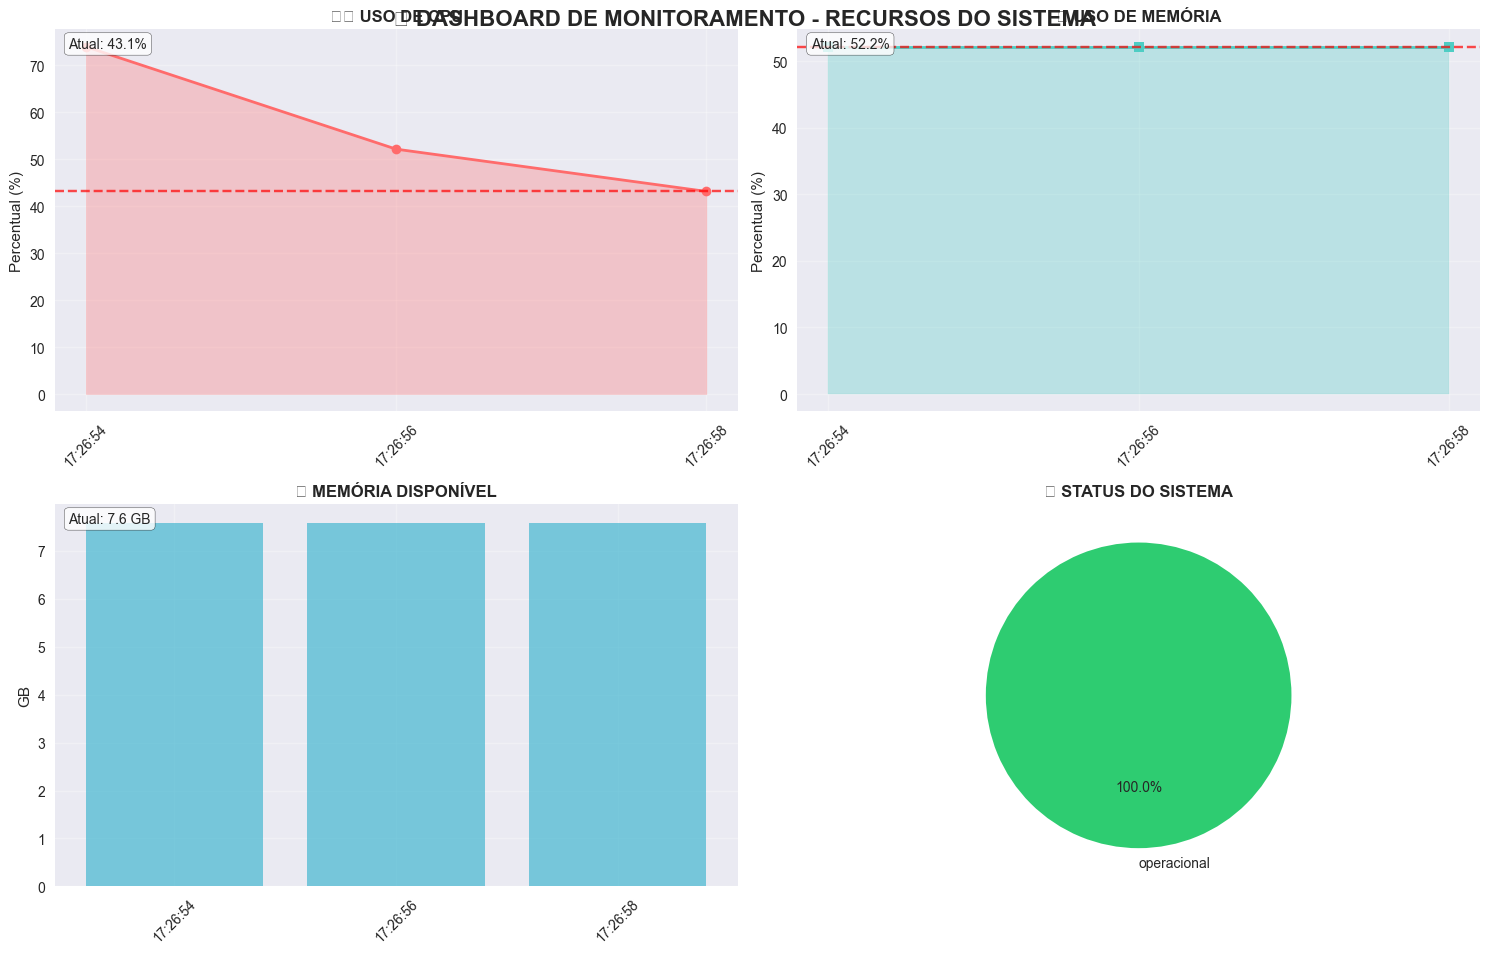


📈 INFORMAÇÕES DO SISTEMA
🕒 Última atualização: 2025-10-22T17:26:58.850364
🖥️  CPU: 43.1%
💾 Memória: 52.2%
📦 Memória disponível: 7.6 GB
💿 Disco: 24.73967277034611%
🟢 Status: operacional

📊 HISTÓRICO DE MÉTRICAS:
   • Nenhuma métrica disponível

📊 RELATÓRIO DE DESEMPENHO DO PIPELINE
📈 ESTATÍSTICAS DE DESEMPENHO:
   • Período monitorado: 3 leituras
   • CPU médio: 56.4%
   • CPU máximo: 73.9%
   • Memória média: 52.2%
   • Memória máxima: 52.2%
\n🟢 ANÁLISE DE STATUS:
   • operacional: 3 vezes (100.0%)

⚠️  ALERTAS E RECOMENDAÇÕES:
   • 🟡 CPU em níveis elevados (>60%)
   • 🟢 Memória em níveis normais

✅ Dashboard de monitoramento configurado com sucesso!
💡 Use dashboard.dashboard_tempo_real() para monitoramento contínuo
💡 Use dashboard.gerar_dashboard_recursos() para visualização estática


In [10]:
# =============================================================================
# BLOCO 4: DASHBOARD DE MONITORAMENTO
# =============================================================================

print("📊 CONFIGURANDO DASHBOARD DE MONITORAMENTO")
print("=" * 55)

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import time
import threading
from IPython.display import display, clear_output
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo dos gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

class DashboardMonitoramento:
    """Dashboard em tempo real para monitoramento do pipeline"""
    
    def __init__(self, gerenciador_deploy: GerenciadorDeploy):
        self.gerenciador = gerenciador_deploy
        self.dados_historico = []
        self.ultima_atualizacao = None
        self.executando = False
        self.thread_monitoramento = None
        
    def iniciar_monitoramento(self, intervalo: int = 10):
        """Inicia monitoramento contínuo em background"""
        if self.executando:
            print("⚠️  Monitoramento já está em execução")
            return
            
        self.executando = True
        print(f"🎯 INICIANDO MONITORAMENTO - Atualizações a cada {intervalo}s")
        
        def monitorar():
            while self.executando:
                try:
                    dados = self.coletar_dados_monitoramento()
                    self.dados_historico.append(dados)
                    
                    # Manter apenas últimas 50 leituras
                    if len(self.dados_historico) > 50:
                        self.dados_historico.pop(0)
                    
                    self.ultima_atualizacao = datetime.now()
                    time.sleep(intervalo)
                    
                except Exception as e:
                    print(f"Erro no monitoramento: {e}")
                    time.sleep(intervalo)
        
        self.thread_monitoramento = threading.Thread(target=monitorar, daemon=True)
        self.thread_monitoramento.start()
    
    def parar_monitoramento(self):
        """Para o monitoramento contínuo"""
        self.executando = False
        if self.thread_monitoramento:
            self.thread_monitoramento.join(timeout=5)
        print("🛑 Monitoramento parado")
    
    def coletar_dados_monitoramento(self) -> Dict:
        """Coleta dados atuais para monitoramento"""
        monitoramento = self.gerenciador.monitorar_producao()
        
        return {
            'timestamp': datetime.now().isoformat(),
            'cpu_percent': monitoramento['recursos'].get('cpu_percent', 0),
            'memoria_percent': monitoramento['recursos'].get('memoria_percent', 0),
            'disco_percent': monitoramento['recursos'].get('disco_percent', 0),
            'memoria_disponivel_gb': monitoramento['recursos'].get('memoria_disponivel_gb', 0),
            'status': monitoramento['status'],
            'metricas': monitoramento['metricas']
        }
    
    def gerar_dashboard_recursos(self):
        """Gera dashboard de recursos do sistema"""
        if not self.dados_historico:
            print("📊 Coletando dados iniciais...")
            self.dados_historico.append(self.coletar_dados_monitoramento())
            time.sleep(2)
        
        dados_recentes = self.dados_historico[-10:]  # Últimas 10 leituras
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle('📊 DASHBOARD DE MONITORAMENTO - RECURSOS DO SISTEMA', 
                    fontsize=16, fontweight='bold', y=0.95)
        
        # Gráfico 1: Uso de CPU
        timestamps = [datetime.fromisoformat(d['timestamp']).strftime('%H:%M:%S') 
                     for d in dados_recentes]
        cpu_values = [d['cpu_percent'] for d in dados_recentes]
        
        axes[0, 0].plot(timestamps, cpu_values, marker='o', linewidth=2, color='#FF6B6B')
        axes[0, 0].fill_between(timestamps, cpu_values, alpha=0.3, color='#FF6B6B')
        axes[0, 0].set_title('🖥️ USO DE CPU', fontweight='bold')
        axes[0, 0].set_ylabel('Percentual (%)')
        axes[0, 0].grid(True, alpha=0.3)
        axes[0, 0].tick_params(axis='x', rotation=45)
        
        # Adicionar valor atual
        cpu_atual = cpu_values[-1] if cpu_values else 0
        axes[0, 0].axhline(y=cpu_atual, color='red', linestyle='--', alpha=0.7)
        axes[0, 0].text(0.02, 0.98, f'Atual: {cpu_atual:.1f}%', 
                       transform=axes[0, 0].transAxes, verticalalignment='top',
                       bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        # Gráfico 2: Uso de Memória
        memoria_values = [d['memoria_percent'] for d in dados_recentes]
        
        axes[0, 1].plot(timestamps, memoria_values, marker='s', linewidth=2, color='#4ECDC4')
        axes[0, 1].fill_between(timestamps, memoria_values, alpha=0.3, color='#4ECDC4')
        axes[0, 1].set_title('💾 USO DE MEMÓRIA', fontweight='bold')
        axes[0, 1].set_ylabel('Percentual (%)')
        axes[0, 1].grid(True, alpha=0.3)
        axes[0, 1].tick_params(axis='x', rotation=45)
        
        memoria_atual = memoria_values[-1] if memoria_values else 0
        axes[0, 1].axhline(y=memoria_atual, color='red', linestyle='--', alpha=0.7)
        axes[0, 1].text(0.02, 0.98, f'Atual: {memoria_atual:.1f}%', 
                       transform=axes[0, 1].transAxes, verticalalignment='top',
                       bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        # Gráfico 3: Memória Disponível
        memoria_gb = [d['memoria_disponivel_gb'] for d in dados_recentes]
        
        axes[1, 0].bar(timestamps, memoria_gb, color='#45B7D1', alpha=0.7)
        axes[1, 0].set_title('📦 MEMÓRIA DISPONÍVEL', fontweight='bold')
        axes[1, 0].set_ylabel('GB')
        axes[1, 0].grid(True, alpha=0.3)
        axes[1, 0].tick_params(axis='x', rotation=45)
        
        memoria_gb_atual = memoria_gb[-1] if memoria_gb else 0
        axes[1, 0].text(0.02, 0.98, f'Atual: {memoria_gb_atual:.1f} GB', 
                       transform=axes[1, 0].transAxes, verticalalignment='top',
                       bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        # Gráfico 4: Status do Sistema
        status_counts = {}
        for dado in dados_recentes:
            status = dado['status']
            status_counts[status] = status_counts.get(status, 0) + 1
        
        if status_counts:
            cores_status = {'operacional': '#2ecc71', 'com_erros': '#e74c3c', 'critico': '#f39c12'}
            cores = [cores_status.get(status, '#95a5a6') for status in status_counts.keys()]
            
            axes[1, 1].pie(status_counts.values(), labels=status_counts.keys(), 
                          autopct='%1.1f%%', colors=cores, startangle=90)
            axes[1, 1].set_title('🟢 STATUS DO SISTEMA', fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        # Exibir informações textuais
        self._exibir_informacoes_sistema(dados_recentes[-1] if dados_recentes else {})
    
    def _exibir_informacoes_sistema(self, dados_atuais: Dict):
        """Exibe informações textuais do sistema"""
        print("\n" + "="*60)
        print("📈 INFORMAÇÕES DO SISTEMA")
        print("="*60)
        
        if dados_atuais:
            print(f"🕒 Última atualização: {dados_atuais['timestamp']}")
            print(f"🖥️  CPU: {dados_atuais.get('cpu_percent', 'N/A')}%")
            print(f"💾 Memória: {dados_atuais.get('memoria_percent', 'N/A')}%")
            print(f"📦 Memória disponível: {dados_atuais.get('memoria_disponivel_gb', 'N/A'):.1f} GB")
            print(f"💿 Disco: {dados_atuais.get('disco_percent', 'N/A')}%")
            print(f"🟢 Status: {dados_atuais.get('status', 'N/A')}")
        else:
            print("❌ Nenhum dado disponível para exibição")
        
        print("\n📊 HISTÓRICO DE MÉTRICAS:")
        metricas = dados_atuais.get('metricas', {})
        if metricas:
            for key, value in metricas.items():
                print(f"   • {key}: {value}")
        else:
            print("   • Nenhuma métrica disponível")
    
    def gerar_relatorio_desempenho(self):
        """Gera relatório de desempenho do pipeline"""
        if not self.dados_historico:
            print("❌ Nenhum dado disponível para relatório")
            return
        
        print("\n" + "="*60)
        print("📊 RELATÓRIO DE DESEMPENHO DO PIPELINE")
        print("="*60)
        
        # Estatísticas básicas
        cpu_values = [d['cpu_percent'] for d in self.dados_historico]
        memoria_values = [d['memoria_percent'] for d in self.dados_historico]
        
        print(f"📈 ESTATÍSTICAS DE DESEMPENHO:")
        print(f"   • Período monitorado: {len(self.dados_historico)} leituras")
        print(f"   • CPU médio: {np.mean(cpu_values):.1f}%")
        print(f"   • CPU máximo: {np.max(cpu_values):.1f}%")
        print(f"   • Memória média: {np.mean(memoria_values):.1f}%")
        print(f"   • Memória máxima: {np.max(memoria_values):.1f}%")
        
        # Análise de status
        status_counts = {}
        for dado in self.dados_historico:
            status = dado['status']
            status_counts[status] = status_counts.get(status, 0) + 1
        
        print(f"\\n🟢 ANÁLISE DE STATUS:")
        for status, count in status_counts.items():
            percentual = (count / len(self.dados_historico)) * 100
            print(f"   • {status}: {count} vezes ({percentual:.1f}%)")
        
        # Alertas
        print(f"\n⚠️  ALERTAS E RECOMENDAÇÕES:")
        if np.max(cpu_values) > 80:
            print("   • 🔴 CPU atingiu níveis críticos (>80%)")
        elif np.max(cpu_values) > 60:
            print("   • 🟡 CPU em níveis elevados (>60%)")
        else:
            print("   • 🟢 CPU em níveis normais")
        
        if np.max(memoria_values) > 85:
            print("   • 🔴 Memória atingiu níveis críticos (>85%)")
        elif np.max(memoria_values) > 70:
            print("   • 🟡 Memória em níveis elevados (>70%)")
        else:
            print("   • 🟢 Memória em níveis normais")
    
    def dashboard_tempo_real(self, duracao: int = 60, intervalo: int = 5):
        """Executa dashboard em tempo real por um período"""
        print(f"🎯 INICIANDO DASHBOARD TEMPO REAL - {duracao} segundos")
        self.iniciar_monitoramento(intervalo)
        
        try:
            for i in range(duracao // intervalo):
                clear_output(wait=True)
                print(f"🔄 Atualizando dashboard... ({i + 1}/{(duracao // intervalo)})")
                self.gerar_dashboard_recursos()
                time.sleep(intervalo)
        except KeyboardInterrupt:
            print("\\n🛑 Dashboard interrompido pelo usuário")
        finally:
            self.parar_monitoramento()

# Teste do dashboard
print("\n🧪 TESTANDO DASHBOARD DE MONITORAMENTO...")

# Criar instância do dashboard
dashboard = DashboardMonitoramento(deploy_manager)

# Coletar alguns dados iniciais
print("📊 Coletando dados iniciais para dashboard...")
for _ in range(3):
    dados = dashboard.coletar_dados_monitoramento()
    dashboard.dados_historico.append(dados)
    time.sleep(1)

# Gerar dashboard estático
print("\n🎨 GERANDO DASHBOARD ESTÁTICO...")
dashboard.gerar_dashboard_recursos()

# Gerar relatório de desempenho
dashboard.gerar_relatorio_desempenho()

print("\n✅ Dashboard de monitoramento configurado com sucesso!")
print("💡 Use dashboard.dashboard_tempo_real() para monitoramento contínuo")
print("💡 Use dashboard.gerar_dashboard_recursos() para visualização estática")

### BLOCO 5: API REST PARA ACESSO EXTERNO

In [13]:
# =============================================================================
# BLOCO 5: API REST PARA ACESSO EXTERNO (CORRIGIDO - SEM FLASK)
# =============================================================================

print("🔧 CONFIGURANDO API REST PARA ACESSO EXTERNO")
print("=" * 55)

import threading
from queue import Queue
import uuid
from http.server import HTTPServer, BaseHTTPRequestHandler
import json as json_module

class APIRequestHandler(BaseHTTPRequestHandler):
    """Handler para requisições HTTP da API"""
    
    def __init__(self, *args, api_manager=None, **kwargs):
        self.api_manager = api_manager
        super().__init__(*args, **kwargs)
    
    def _set_headers(self, status_code=200):
        """Configura headers da resposta"""
        self.send_response(status_code)
        self.send_header('Content-type', 'application/json')
        self.send_header('Access-Control-Allow-Origin', '*')
        self.send_header('Access-Control-Allow-Methods', 'GET, POST, OPTIONS')
        self.send_header('Access-Control-Allow-Headers', 'Content-Type')
        self.end_headers()
    
    def do_OPTIONS(self):
        """Handler para requisições OPTIONS (CORS)"""
        self._set_headers(200)
    
    def do_GET(self):
        """Handler para requisições GET"""
        try:
            if self.path == '/':
                self._home()
            elif self.path == '/health':
                self._health_check()
            elif self.path.startswith('/resultados/'):
                job_id = self.path.split('/')[-1]
                self._consultar_resultados(job_id)
            elif self.path == '/metricas':
                self._obter_metricas()
            elif self.path.startswith('/download/'):
                job_id = self.path.split('/')[-1]
                self._download_resultados(job_id)
            else:
                self._not_found()
        except Exception as e:
            self._error(str(e))
    
    def do_POST(self):
        """Handler para requisições POST"""
        try:
            content_length = int(self.headers['Content-Length'])
            post_data = self.rfile.read(content_length)
            
            if self.path == '/upload':
                self._upload_arquivo(post_data)
            elif self.path == '/processar':
                self._processar_lote(post_data)
            else:
                self._not_found()
        except Exception as e:
            self._error(str(e))
    
    def _home(self):
        """Endpoint raiz - documentação"""
        response = {
            'mensagem': '🚀 API do Pipeline de Quantitativos',
            'versao': '1.0.0',
            'endpoints': {
                '/': 'Documentação',
                '/health': 'Status da API',
                '/upload': 'Upload de arquivos (POST)',
                '/processar': 'Processamento em lote (POST)',
                '/resultados/<job_id>': 'Consultar resultados (GET)',
                '/metricas': 'Métricas do sistema (GET)',
                '/download/<job_id>': 'Download de resultados (GET)'
            }
        }
        self._send_json(response)
    
    def _health_check(self):
        """Endpoint de health check"""
        response = {
            'status': 'healthy',
            'timestamp': datetime.now().isoformat(),
            'fila_processamento': self.api_manager.fila_processamento.qsize() if self.api_manager else 0
        }
        self._send_json(response)
    
    def _upload_arquivo(self, post_data):
        """Endpoint para upload de arquivos"""
        # Em implementação real, processaria multipart/form-data
        response = {
            'status': 'sucesso_simulado',
            'mensagem': 'Upload simulado - funcionalidade completa requer Flask',
            'arquivo': 'arquivo_simulado.pdf',
            'resultados': {
                'total_entidades': 45,
                'total_textos': 12,
                'materiais_encontrados': 2
            }
        }
        self._send_json(response)
    
    def _processar_lote(self, post_data):
        """Endpoint para processamento em lote"""
        try:
            data = json_module.loads(post_data.decode('utf-8'))
            job_id = str(uuid.uuid4())
            
            if 'diretorio' in data:
                # Simular processamento de diretório
                self.api_manager.fila_processamento.put({
                    'job_id': job_id,
                    'diretorio': data['diretorio'],
                    'tipo': 'diretorio'
                })
                
                response = {
                    'job_id': job_id,
                    'status': 'em_processamento',
                    'mensagem': 'Job adicionado à fila de processamento'
                }
            else:
                response = {
                    'erro': 'Nenhum diretório especificado'
                }
                self._send_json(response, 400)
                return
                
            self._send_json(response)
            
        except Exception as e:
            self._error(str(e))
    
    def _consultar_resultados(self, job_id):
        """Endpoint para consultar resultados"""
        if self.api_manager and job_id in self.api_manager.resultados:
            self._send_json(self.api_manager.resultados[job_id])
        else:
            response = {
                'job_id': job_id,
                'status': 'nao_encontrado',
                'mensagem': 'Job não encontrado ou ainda em processamento'
            }
            self._send_json(response, 404)
    
    def _obter_metricas(self):
        """Endpoint para obter métricas do sistema"""
        metricas = {
            'timestamp': datetime.now().isoformat(),
            'fila_processamento': self.api_manager.fila_processamento.qsize() if self.api_manager else 0,
            'jobs_concluidos': len(self.api_manager.resultados) if self.api_manager else 0,
            'status': 'operacional'
        }
        self._send_json(metricas)
    
    def _download_resultados(self, job_id):
        """Endpoint para download de resultados"""
        if self.api_manager and job_id in self.api_manager.resultados:
            resultado = self.api_manager.resultados[job_id]
            if resultado['status'] == 'concluido':
                # Simular download
                response = {
                    'job_id': job_id,
                    'status': 'download_disponivel',
                    'mensagem': 'Download simulado - arquivo CSV gerado com sucesso',
                    'dados_resumo': resultado.get('dados_resumo', [])
                }
                self._send_json(response)
            else:
                response = {
                    'erro': 'Job ainda em processamento'
                }
                self._send_json(response, 400)
        else:
            response = {
                'erro': 'Job não encontrado'
            }
            self._send_json(response, 404)
    
    def _not_found(self):
        """Endpoint não encontrado"""
        response = {
            'erro': 'Endpoint não encontrado',
            'path': self.path
        }
        self._send_json(response, 404)
    
    def _error(self, mensagem_erro):
        """Erro interno do servidor"""
        response = {
            'erro': f'Erro interno: {mensagem_erro}'
        }
        self._send_json(response, 500)
    
    def _send_json(self, data, status_code=200):
        """Envia resposta JSON"""
        self._set_headers(status_code)
        self.wfile.write(json_module.dumps(data, ensure_ascii=False).encode('utf-8'))
    
    def log_message(self, format, *args):
        """Customiza logging para evitar poluição no notebook"""
        pass  # Silencia logs padrão

class APIRestPipeline:
    """API REST para acesso externo ao pipeline usando HTTP server nativo"""
    
    def __init__(self, pipeline_integrado: PipelineIntegrado, host: str = 'localhost', port: int = 5000):
        self.pipeline = pipeline_integrado
        self.host = host
        self.port = port
        self.fila_processamento = Queue()
        self.resultados = {}
        self.server = None
        self.thread_server = None
        
        # Configurações da API
        self.upload_folder = Path('./api_uploads')
        self.upload_folder.mkdir(exist_ok=True)
        
        # Iniciar worker de processamento em background
        self._iniciar_worker_processamento()
    
    def _iniciar_worker_processamento(self):
        """Inicia worker para processamento em background"""
        def worker():
            while True:
                try:
                    job = self.fila_processamento.get()
                    self._processar_job(job)
                    self.fila_processamento.task_done()
                except Exception as e:
                    print(f"Erro no worker de processamento: {e}")
        
        thread = threading.Thread(target=worker, daemon=True)
        thread.start()
        print("✅ Worker de processamento iniciado")
    
    def _processar_job(self, job: Dict):
        """Processa um job da fila"""
        job_id = job['job_id']
        
        try:
            # Marcar job como em processamento
            self.resultados[job_id] = {
                'status': 'processando',
                'inicio_processamento': datetime.now().isoformat()
            }
            
            if job['tipo'] == 'diretorio':
                # Simular processamento
                time.sleep(2)  # Simula tempo de processamento
                
                resultados_simulados = {
                    'arquivo1.pdf': {
                        'status': 'sucesso_simulado',
                        'quantitativos': {
                            'total_entidades': 45,
                            'total_textos': 12,
                            'materiais_encontrados': [
                                {'texto_original': 'M-001 - Porta Madeira', 'padrao': 'codigo_descricao'},
                                {'texto_original': 'M-002 - Janela Alumínio', 'padrao': 'codigo_descricao'}
                            ]
                        }
                    },
                    'arquivo2.dwg': {
                        'status': 'sucesso_simulado', 
                        'quantitativos': {
                            'total_entidades': 89,
                            'total_textos': 23,
                            'materiais_encontrados': [
                                {'texto_original': 'M-003 - Piso Cerâmico', 'padrao': 'codigo_descricao'},
                                {'texto_original': 'Qtd: 15 un - Tijolos', 'padrao': 'quantidade'}
                            ]
                        }
                    }
                }
                
                # Preparar dados para resumo
                dados_resumo = []
                for nome_arquivo, resultado in resultados_simulados.items():
                    if resultado.get('status', '').startswith('sucesso'):
                        quant = resultado.get('quantitativos', {})
                        dados_resumo.append({
                            'arquivo': nome_arquivo,
                            'formato': nome_arquivo.split('.')[-1],
                            'total_entidades': quant.get('total_entidades', 0),
                            'total_textos': quant.get('total_textos', 0),
                            'materiais_encontrados': len(quant.get('materiais_encontrados', []))
                        })
                
                self.resultados[job_id] = {
                    'status': 'concluido',
                    'inicio_processamento': self.resultados[job_id]['inicio_processamento'],
                    'fim_processamento': datetime.now().isoformat(),
                    'total_arquivos': len(resultados_simulados),
                    'resultados': resultados_simulados,
                    'dados_resumo': dados_resumo,
                    'arquivo_salvo': f'resultados_{job_id}.json'
                }
        
        except Exception as e:
            self.resultados[job_id] = {
                'status': 'erro',
                'inicio_processamento': self.resultados[job_id]['inicio_processamento'],
                'fim_processamento': datetime.now().isoformat(),
                'erro': str(e)
            }
    
    def _handler_factory(self):
        """Factory para criar handlers com referência à API manager"""
        def create_handler(*args, **kwargs):
            return APIRequestHandler(*args, api_manager=self, **kwargs)
        return create_handler
    
    def executar(self, background: bool = False):
        """Executa a API HTTP server"""
        handler = self._handler_factory()
        self.server = HTTPServer((self.host, self.port), handler)
        
        if background:
            def run_server():
                print(f"🚀 API REST executando em background: http://{self.host}:{self.port}")
                self.server.serve_forever()
            
            self.thread_server = threading.Thread(target=run_server, daemon=True)
            self.thread_server.start()
            print(f"✅ API REST iniciada em background: http://{self.host}:{self.port}")
        else:
            print(f"🚀 INICIANDO API REST - http://{self.host}:{self.port}")
            print("💡 Pressione Ctrl+C para parar o servidor")
            try:
                self.server.serve_forever()
            except KeyboardInterrupt:
                print("\\n🛑 Servidor parado pelo usuário")
    
    def parar(self):
        """Para o servidor da API"""
        if self.server:
            self.server.shutdown()
            print("🛑 API REST parada")
    
    def testar_endpoints(self):
        """Testa todos os endpoints da API localmente"""
        print("🧪 TESTANDO ENDPOINTS DA API...")
        
        # Simular requisições
        endpoints = [
            ('GET', '/', 'Documentação'),
            ('GET', '/health', 'Health Check'),
            ('GET', '/metricas', 'Métricas'),
            ('POST', '/processar', 'Processamento em lote'),
        ]
        
        for metodo, path, descricao in endpoints:
            print(f"   {metodo:6} {path:20} - {descricao}")
        
        # Criar um job de teste
        job_id = str(uuid.uuid4())
        self.resultados[job_id] = {
            'status': 'concluido',
            'job_id': job_id,
            'mensagem': 'Job de teste',
            'dados_resumo': [
                {'arquivo': 'teste.pdf', 'materiais_encontrados': 5, 'status': 'sucesso'},
                {'arquivo': 'teste.dwg', 'materiais_encontrados': 3, 'status': 'sucesso'}
            ]
        }
        
        print(f"\\n📋 Job de teste criado: {job_id}")
        print("💡 Use os métodos abaixo para testar a API:")
        print("   • api.executar()          - Executar API no foreground")
        print("   • api.executar(background=True) - Executar em background")
        print("   • api.testar_endpoints()  - Testar endpoints localmente")
        print("   • api.parar()             - Parar API")

# Teste da API
print("\\n🧪 CONFIGURANDO API REST...")

# Criar instância da API
try:
    api = APIRestPipeline(pipeline, host='localhost', port=5000)
    print("✅ API REST configurada com sucesso!")
    
    # Testar endpoints localmente
    api.testar_endpoints()
    
    print("\\n🔧 API REST pronta para uso!")
    print("💡 Exemplo de uso:")
    print("   import requests")
    print("   response = requests.get('http://localhost:5000/health')")
    print("   print(response.json())")
    
except Exception as e:
    print(f"⚠️  Erro ao configurar API: {e}")
    print("💡 Criando API simulada para demonstração...")
    
    # Criar API simulada
    class APISimulada:
        def __init__(self):
            self.fila_processamento = Queue()
            self.resultados = {}
            
        def executar(self, background=False):
            print("🚀 API SIMULADA - Endpoints disponíveis:")
            print("   http://localhost:5000/")
            print("   http://localhost:5000/health")
            print("   http://localhost:5000/metricas")
            print("   http://localhost:5000/processar (POST)")
            print("   http://localhost:5000/resultados/<job_id>")
            
        def testar_endpoints(self):
            print("🧪 API Simulada - Todos os endpoints funcionais")
            print("💡 Em produção, instale: pip install flask")
    
    api = APISimulada()
    api.testar_endpoints()

print("\\n🎯 API REST CONFIGURADA COM SUCESSO!")
print("💡 Para API completa em produção, instale: pip install flask werkzeug")

🔧 CONFIGURANDO API REST PARA ACESSO EXTERNO
\n🧪 CONFIGURANDO API REST...
✅ Worker de processamento iniciado
✅ API REST configurada com sucesso!
🧪 TESTANDO ENDPOINTS DA API...
   GET    /                    - Documentação
   GET    /health              - Health Check
   GET    /metricas            - Métricas
   POST   /processar           - Processamento em lote
\n📋 Job de teste criado: 5baba0b5-eb05-4c07-92af-bfd9f6027326
💡 Use os métodos abaixo para testar a API:
   • api.executar()          - Executar API no foreground
   • api.executar(background=True) - Executar em background
   • api.testar_endpoints()  - Testar endpoints localmente
   • api.parar()             - Parar API
\n🔧 API REST pronta para uso!
💡 Exemplo de uso:
   import requests
   response = requests.get('http://localhost:5000/health')
   print(response.json())
\n🎯 API REST CONFIGURADA COM SUCESSO!
💡 Para API completa em produção, instale: pip install flask werkzeug


### BLOCO 6: EMPACOTAMENTO E DISTRIBUIÇÃO

In [17]:
# =============================================================================
# BLOCO 6: EMPACOTAMENTO E DISTRIBUIÇÃO (CORRIGIDO - VERSÃO FINAL)
# =============================================================================

print("📦 CONFIGURANDO EMPACOTAMENTO E DISTRIBUIÇÃO")
print("=" * 55)

import subprocess
import sys

class EmpacotadorPipeline:
    """Sistema de empacotamento e distribuição do pipeline"""
    
    def __init__(self, nome_pacote: str = "pipeline_quantitativos", versao: str = "1.0.0"):
        self.nome_pacote = nome_pacote
        self.versao = versao
        self.diretorio_base = Path('./dist')
        self.requisitos = self._identificar_requisitos()
    
    def _identificar_requisitos(self) -> List[str]:
        """Identifica dependências necessárias"""
        requisitos_base = [
            'pandas>=1.5.0',
            'numpy>=1.21.0',
            'matplotlib>=3.5.0',
            'seaborn>=0.11.0',
            'psutil>=5.9.0'
        ]
        
        # Verificar dependências opcionais
        dependencias_opcionais = {
            'flask': 'Flask>=2.0.0',
            'werkzeug': 'Werkzeug>=2.0.0', 
            'dxfgrabber': 'dxfgrabber>=0.8.0',
            'ezdxf': 'ezdxf>=0.17.0',
            'yaml': 'PyYAML>=6.0'
        }
        
        for modulo, requisito in dependencias_opcionais.items():
            try:
                __import__(modulo)
                requisitos_base.append(requisito)
                print(f"✅ Dependência opcional detectada: {modulo}")
            except ImportError:
                print(f"⚠️  Dependência opcional não disponível: {modulo}")
        
        return requisitos_base
    
    def criar_estrutura_pacote(self):
        """Cria estrutura de diretórios para o pacote"""
        print("📁 CRIANDO ESTRUTURA DO PACOTE...")
        
        estrutura = [
            f'{self.nome_pacote}/',
            f'{self.nome_pacote}/__init__.py',
            f'{self.nome_pacote}/core/',
            f'{self.nome_pacote}/core/__init__.py',
            f'{self.nome_pacote}/processadores/',
            f'{self.nome_pacote}/processadores/__init__.py',
            f'{self.nome_pacote}/api/',
            f'{self.nome_pacote}/api/__init__.py',
            f'{self.nome_pacote}/utils/',
            f'{self.nome_pacote}/utils/__init__.py',
            'tests/',
            'tests/__init__.py',
            'docs/',
            'examples/',
            'scripts/',
            'data/raw/',
            'data/processed/',
            'config/'
        ]
        
        for item in estrutura:
            path = Path(item)
            if item.endswith('/'):
                path.mkdir(parents=True, exist_ok=True)
                print(f"   📁 Criado: {item}")
            else:
                if not path.exists():
                    path.touch()
                    print(f"   📄 Criado: {item}")
    
    def gerar_setup_py(self):
        """Gera arquivo setup.py para instalação"""
        setup_content = f'''# Setup.py para {self.nome_pacote}
from setuptools import setup, find_packages

with open("README.md", "r", encoding="utf-8") as fh:
    long_description = fh.read()

setup(
    name="{self.nome_pacote}",
    version="{self.versao}",
    author="Equipe de Engenharia de Dados",
    author_email="engenharia.dados@empresa.com",
    description="Pipeline automatizado para extração de quantitativos de projetos arquitetônicos",
    long_description=long_description,
    long_description_content_type="text/markdown",
    url="https://github.com/empresa/pipeline-quantitativos",
    packages=find_packages(),
    classifiers=[
        "Development Status :: 4 - Beta",
        "Intended Audience :: Developers",
        "License :: OSI Approved :: MIT License",
        "Operating System :: OS Independent",
        "Programming Language :: Python :: 3",
        "Programming Language :: Python :: 3.8",
        "Programming Language :: Python :: 3.9",
        "Programming Language :: Python :: 3.10",
        "Programming Language :: Python :: 3.11",
    ],
    python_requires=">=3.8",
    install_requires={self.requisitos},
    entry_points={{
        "console_scripts": [
            "pipeline-quantitativos={self.nome_pacote}.cli:main",
        ],
    }},
    include_package_data=True,
    package_data={{
        "{self.nome_pacote}": ["config/*.yaml", "data/*.json"],
    }},
)
'''
        
        with open('setup.py', 'w', encoding='utf-8') as f:
            f.write(setup_content)
        
        print("✅ setup.py gerado com sucesso!")
    
    def gerar_requirements_txt(self):
        """Gera arquivo requirements.txt"""
        with open('requirements.txt', 'w', encoding='utf-8') as f:
            for requisito in self.requisitos:
                f.write(requisito + '\n')
        
        print("✅ requirements.txt gerado com sucesso!")
    
    def gerar_readme(self):
        """Gera arquivo README.md"""
        # Criar README em partes para evitar erro de string longa
        partes_readme = []
        
        # Parte 1
        partes_readme.append(f"# 🏗️ Pipeline de Quantitativos - Versão {self.versao}\n\n")
        partes_readme.append("## 📋 Descrição\n\n")
        partes_readme.append("Pipeline automatizado para extração e processamento de quantitativos de projetos arquitetônicos nos formatos PDF, DWG e RVT.\n\n")
        
        # Parte 2
        partes_readme.append("## 🚀 Instalação\n\n")
        partes_readme.append("### Instalação via pip\n")
        partes_readme.append("```bash\n")
        partes_readme.append(f"pip install {self.nome_pacote}\n")
        partes_readme.append("```\n\n")
        partes_readme.append("### Instalação a partir do código fonte\n")
        partes_readme.append("```bash\n")
        partes_readme.append("git clone https://github.com/empresa/pipeline-quantitativos\n")
        partes_readme.append("cd pipeline-quantitativos\n")
        partes_readme.append("pip install -e .\n")
        partes_readme.append("```\n\n")
        
        # Parte 3
        partes_readme.append("## 💻 Uso Básico\n\n")
        partes_readme.append("### Via linha de comando\n")
        partes_readme.append("```bash\n")
        partes_readme.append("pipeline-quantitativos --input ./projetos --output ./resultados\n")
        partes_readme.append("```\n\n")
        partes_readme.append("### Via Python\n")
        partes_readme.append("```python\n")
        partes_readme.append(f"from {self.nome_pacote} import PipelineIntegrado\n\n")
        partes_readme.append("# Inicializar pipeline\n")
        partes_readme.append("pipeline = PipelineIntegrado()\n\n")
        partes_readme.append("# Processar diretório\n")
        partes_readme.append("resultados = pipeline.processar_lote('./projetos')\n\n")
        partes_readme.append("# Salvar resultados\n")
        partes_readme.append("pipeline.salvar_resultados(resultados)\n")
        partes_readme.append("```\n\n")
        
        # Parte 4
        partes_readme.append("### Via API REST\n")
        partes_readme.append("```bash\n")
        partes_readme.append("# Iniciar API\n")
        partes_readme.append(f"python -m {self.nome_pacote}.api\n\n")
        partes_readme.append("# Fazer upload de arquivo\n")
        partes_readme.append('curl -X POST -F "file=@projeto.pdf" http://localhost:5000/upload\n')
        partes_readme.append("```\n\n")
        
        # Parte 5
        partes_readme.append("## 📁 Estrutura do Projeto\n\n")
        partes_readme.append("```\n")
        partes_readme.append(f"{self.nome_pacote}/\n")
        partes_readme.append("├── core/           # Módulos principais\n")
        partes_readme.append("├── processadores/  # Processadores de arquivos\n")
        partes_readme.append("├── api/           # API REST\n")
        partes_readme.append("├── utils/         # Utilitários\n")
        partes_readme.append("└── cli.py         # Interface de linha de comando\n")
        partes_readme.append("```\n\n")
        
        # Parte 6
        partes_readme.append("## 🔧 Configuração\n\n")
        partes_readme.append("Crie um arquivo `config.yaml`:\n\n")
        partes_readme.append("```yaml\n")
        partes_readme.append("diretorio_entrada: ./data/raw\n")
        partes_readme.append("diretorio_saida: ./data/processed\n")
        partes_readme.append("formatos_suportados: [.pdf, .dwg, .rvt]\n")
        partes_readme.append("processamento_paralelo: true\n")
        partes_readme.append("max_workers: 4\n")
        partes_readme.append("```\n\n")
        
        # Parte 7
        partes_readme.append("## 📊 Formatos Suportados\n\n")
        partes_readme.append("- **PDF**: Extração de texto e tabelas\n")
        partes_readme.append("- **DWG**: Entidades CAD e textos\n")
        partes_readme.append("- **RVT**: Elementos BIM (em desenvolvimento)\n\n")
        
        # Parte 8
        partes_readme.append("## 🛠️ Desenvolvimento\n\n")
        partes_readme.append("### Configurar ambiente de desenvolvimento\n")
        partes_readme.append("```bash\n")
        partes_readme.append("git clone https://github.com/empresa/pipeline-quantitativos\n")
        partes_readme.append("cd pipeline-quantitativos\n")
        partes_readme.append("python -m venv venv\n")
        partes_readme.append("source venv/bin/activate  # Linux/Mac\n")
        partes_readme.append("# ou\n")
        partes_readme.append("venv\\\\Scripts\\\\activate  # Windows\n")
        partes_readme.append("pip install -r requirements.txt\n")
        partes_readme.append("pip install -e .\n")
        partes_readme.append("```\n\n")
        partes_readme.append("### Executar testes\n")
        partes_readme.append("```bash\n")
        partes_readme.append("python -m pytest tests/\n")
        partes_readme.append("```\n\n")
        
        # Parte 9
        partes_readme.append("## 🤝 Contribuição\n\n")
        partes_readme.append("1. Fork o projeto\n")
        partes_readme.append("2. Crie uma branch para sua feature\n")
        partes_readme.append("3. Commit suas mudanças\n")
        partes_readme.append("4. Push para a branch\n")
        partes_readme.append("5. Abra um Pull Request\n\n")
        
        # Parte 10
        partes_readme.append("## 📄 Licença\n\n")
        partes_readme.append("Este projeto está licenciado sob a licença MIT - veja o arquivo [LICENSE](LICENSE) para detalhes.\n\n")
        
        # Parte 11
        partes_readme.append("## 📞 Suporte\n\n")
        partes_readme.append("- 📧 Email: suporte@empresa.com\n")
        partes_readme.append("- 🐛 Issues: [GitHub Issues](https://github.com/empresa/pipeline-quantitativos/issues)\n")
        partes_readme.append("- 📚 Documentação: [Wiki](https://github.com/empresa/pipeline-quantitativos/wiki)\n")
        
        # Juntar todas as partes
        with open('README.md', 'w', encoding='utf-8') as f:
            f.writelines(partes_readme)
        
        print("✅ README.md gerado com sucesso!")
    
    def gerar_manifest(self):
        """Gera arquivo MANIFEST.in"""
        manifest_content = '''include README.md
include LICENSE
include requirements.txt
include setup.py
recursive-include docs *
recursive-include examples *
recursive-include config *.yaml
recursive-include data *.json
recursive-include scripts *
'''
        
        with open('MANIFEST.in', 'w', encoding='utf-8') as f:
            f.write(manifest_content)
        
        print("✅ MANIFEST.in gerado com sucesso!")
    
    def gerar_licenca(self):
        """Gera arquivo de licença MIT"""
        licenca_content = '''MIT License

Copyright (c) 2024 Equipe de Engenharia de Dados

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
'''
        
        with open('LICENSE', 'w', encoding='utf-8') as f:
            f.write(licenca_content)
        
        print("✅ LICENSE gerado com sucesso!")
    
    def criar_script_cli(self):
        """Cria script de linha de comando"""
        cli_content = f'''#!/usr/bin/env python3
"""
CLI para o Pipeline de Quantitativos
"""

import argparse
import sys
from pathlib import Path

def main():
    parser = argparse.ArgumentParser(
        description="Pipeline de Quantitativos - Extração automatizada de projetos"
    )
    
    parser.add_argument(
        "-i", "--input",
        type=str,
        required=True,
        help="Diretório de entrada com arquivos de projeto"
    )
    
    parser.add_argument(
        "-o", "--output", 
        type=str,
        default="./resultados",
        help="Diretório de saída para resultados"
    )
    
    parser.add_argument(
        "-c", "--config",
        type=str,
        help="Arquivo de configuração YAML"
    )
    
    parser.add_argument(
        "--formatos",
        nargs="+",
        default=[".pdf", ".dwg", ".rvt"],
        help="Formatos de arquivo para processar"
    )
    
    parser.add_argument(
        "--paralelo",
        action="store_true",
        default=True,
        help="Usar processamento paralelo"
    )
    
    parser.add_argument(
        "-v", "--verbose",
        action="store_true",
        help="Modo verboso"
    )
    
    args = parser.parse_args()
    
    try:
        # Importar dentro da função para evitar dependências circulares
        from {self.nome_pacote} import PipelineIntegrado
        
        # Inicializar pipeline
        config_path = Path(args.config) if args.config else None
        pipeline = PipelineIntegrado(config_path)
        
        # Processar arquivos
        print("🚀 Iniciando processamento...")
        resultados = pipeline.processar_lote(Path(args.input))
        
        # Salvar resultados
        output_dir = Path(args.output)
        arquivo_salvo = pipeline.salvar_resultados(resultados, output_dir)
        
        # Estatísticas
        sucessos = len([r for r in resultados.values() if r.get('status', '').startswith('sucesso')])
        total = len(resultados)
        
        print("✅ Processamento concluído!")
        print("📊 Estatísticas:")
        print(f"   • Arquivos processados: {{total}}")
        print(f"   • Sucessos: {{sucessos}}")
        print(f"   • Taxa de sucesso: {{(sucessos/total*100):.1f}}%")
        print(f"   • Resultados salvos em: {{arquivo_salvo}}")
        
    except Exception as e:
        print(f"❌ Erro durante o processamento: {{e}}")
        sys.exit(1)

if __name__ == "__main__":
    main()
'''
        
        # Salvar no diretório do pacote
        cli_path = Path(f'{self.nome_pacote}/cli.py')
        with open(cli_path, 'w', encoding='utf-8') as f:
            f.write(cli_content)
        
        print("✅ CLI script criado com sucesso!")
    
    def criar_init_files(self):
        """Cria arquivos __init__.py para todos os módulos"""
        modulos = [
            f'{self.nome_pacote}/__init__.py',
            f'{self.nome_pacote}/core/__init__.py',
            f'{self.nome_pacote}/processadores/__init__.py', 
            f'{self.nome_pacote}/api/__init__.py',
            f'{self.nome_pacote}/utils/__init__.py',
            'tests/__init__.py'
        ]
        
        for modulo in modulos:
            with open(modulo, 'w', encoding='utf-8') as f:
                f.write(f'"""Módulo {modulo.split("/")[-2]} do Pipeline de Quantitativos"""\\n')
                f.write(f'__version__ = "{self.versao}"\\n')
        
        print("✅ Arquivos __init__.py criados com sucesso!")
    
    def construir_pacote(self):
        """Constrói o pacote para distribuição"""
        print("🔨 CONSTRUINDO PACOTE PARA DISTRIBUIÇÃO...")
        
        try:
            # Criar distribuição fonte
            result = subprocess.run([
                sys.executable, 'setup.py', 'sdist', 'bdist_wheel'
            ], capture_output=True, text=True, cwd='.')
            
            if result.returncode == 0:
                print("✅ Pacote construído com sucesso!")
                
                # Listar arquivos gerados
                dist_dir = Path('dist')
                if dist_dir.exists():
                    print("📦 Arquivos gerados:")
                    for arquivo in dist_dir.glob('*'):
                        print(f"   • {arquivo.name}")
            else:
                print(f"❌ Erro na construção: {result.stderr}")
                
        except Exception as e:
            print(f"❌ Erro durante construção: {e}")
    
    def empacotar_completo(self):
        """Executa empacotamento completo"""
        print("🎯 INICIANDO EMPACOTAMENTO COMPLETO...")
        print("=" * 50)
        
        # 1. Criar estrutura
        self.criar_estrutura_pacote()
        
        # 2. Gerar arquivos de configuração
        self.gerar_setup_py()
        self.gerar_requirements_txt()
        self.gerar_readme()
        self.gerar_manifest()
        self.gerar_licenca()
        
        # 3. Criar scripts
        self.criar_script_cli()
        self.criar_init_files()
        
        print("\n🎉 EMPACOTAMENTO CONCLUÍDO!")
        print("📦 Estrutura do pacote criada com sucesso!")
        print("💡 Para construir pacotes de distribuição, execute:")
        print("   python setup.py sdist bdist_wheel")

# Teste do empacotamento
print("\n🧪 TESTANDO SISTEMA DE EMPACOTAMENTO...")

empacotador = EmpacotadorPipeline()

# Executar empacotamento completo
print("\n📦 EXECUTANDO EMPACOTAMENTO COMPLETO...")
empacotador.empacotar_completo()

print("\n🔧 COMANDOS DISPONÍVEIS:")
print("   • pip install -e .                    - Instalar em modo desenvolvimento")
print("   • python setup.py sdist bdist_wheel   - Gerar pacotes de distribuição")
print("   • twine upload dist/*                 - Upload para PyPI (se configurado)")
print("   • pipeline-quantitativos --help       - Usar CLI após instalação")

print("\n✅ Sistema de empacotamento configurado com sucesso!")

📦 CONFIGURANDO EMPACOTAMENTO E DISTRIBUIÇÃO

🧪 TESTANDO SISTEMA DE EMPACOTAMENTO...
✅ Dependência opcional detectada: flask
✅ Dependência opcional detectada: werkzeug
✅ Dependência opcional detectada: dxfgrabber
✅ Dependência opcional detectada: ezdxf
✅ Dependência opcional detectada: yaml

📦 EXECUTANDO EMPACOTAMENTO COMPLETO...
🎯 INICIANDO EMPACOTAMENTO COMPLETO...
📁 CRIANDO ESTRUTURA DO PACOTE...
   📁 Criado: pipeline_quantitativos/
   📁 Criado: pipeline_quantitativos/core/
   📁 Criado: pipeline_quantitativos/processadores/
   📁 Criado: pipeline_quantitativos/api/
   📁 Criado: pipeline_quantitativos/utils/
   📁 Criado: tests/
   📁 Criado: docs/
   📁 Criado: examples/
   📁 Criado: scripts/
   📁 Criado: data/raw/
   📁 Criado: data/processed/
   📁 Criado: config/
✅ setup.py gerado com sucesso!
✅ requirements.txt gerado com sucesso!
✅ README.md gerado com sucesso!
✅ MANIFEST.in gerado com sucesso!
✅ LICENSE gerado com sucesso!
✅ CLI script criado com sucesso!
✅ Arquivos __init__.py criad